<img src='http://drive.google.com/uc?export=view&id=1Lv8NU_SuGQ9uVjU8N6_NwNi72qbSnbQL'>

# <font color='lightblue'>Exploritory Data Analysis</font>

In this project you will perform an exploritory data analysis (EDA) using visualizations and correlations. You may choose from one of the datasets within the [class shared data folder](https://drive.google.com/drive/folders/1s2Civxvys_SR1sFF7D2ept1GSmFbICQb?usp=sharing), or search for a dataset that interests you the most! [Kaggle](https://www.kaggle.com/datasets?fileType=csv) is a good place to start, as they often have relatively clean and easy to use datasets, but feel free to explore other places. There is a lot of data out there!

In this project you will:

1.  Choose and download a dataset
2.  Get summary statistics for key variables
3.  Create visuals to help understand your data
4.  Use correlation to measure relationships between key variables
5.  Summarise how EDA helped (or not!) in understanding your dataset



Import python libraries


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## <font color='lightblue'>1. Data </font>

**Action:** Import your data into colaboratory.


In [ ]:
top_songs = pd.read_csv('/content/Spotify 2010 - 2019 Top 100.csv')

# Remove last 3 rows (They are null values)
top_songs = top_songs[0:999]

# Convert type on years to integers
top_songs['year released'] = top_songs['year released'].astype('Int64')
top_songs['top year'] = top_songs['top year'].astype('Int64')

# Show some of the dataset
top_songs.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010,Solo


**Action:** Determine the types of data are you dealing with.

In [ ]:
top_songs.dtypes

title             object
artist            object
top genre         object
year released      Int64
added             object
bpm              float64
nrgy             float64
dnce             float64
dB               float64
live             float64
val              float64
dur              float64
acous            float64
spch             float64
pop              float64
top year           Int64
artist type       object
dtype: object

## <font color='lightblue'>2. Summary statistics</font>

**Action:** Estimate the summary statistics of some of the key variables

In [ ]:
# Helper function to print summary statistics for a given field
def SumStats(field):
  meanVal = top_songs[field].mean()
  medianVal = top_songs[field].median()
  modeVal = top_songs[field].mode()
  stdVal = top_songs[field].std()

  print("============ Field:", field, "============")
  print("mean:", meanVal)
  print("median:", medianVal)
  print("mode:", modeVal[0])
  print("std:", stdVal)
  print("")

In [ ]:
# BPM
SumStats("bpm")

# Energy (nrgy)
SumStats("nrgy")

# Danceability (dnce)
SumStats("dnce")

# Positivity (val)
SumStats("val")

============ Field: bpm ============
mean: 121.28528528528528
median: 122.0
mode: 128.0
std: 26.24082421351325

============ Field: nrgy ============
mean: 69.51251251251252
median: 71.0
mode: 79.0
std: 15.965945522468953

============ Field: dnce ============
mean: 66.86286286286287
median: 68.0
mode: 67.0
std: 13.121912260602958

============ Field: val ============
mean: 50.933933933933936
median: 51.0
mode: 45.0
std: 21.549022259962523



## <font color='lightblue'>3. Visualize the data</font>

**Action:** Visualize the distribution of values for some key variables

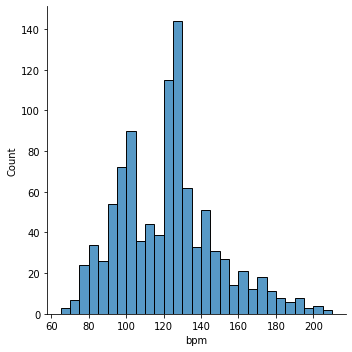

In [ ]:
# Show distrubtion of all BPM values
sns.displot(top_songs, x='bpm', binwidth=5)

[Text(0, 0.5, 'Energy')]

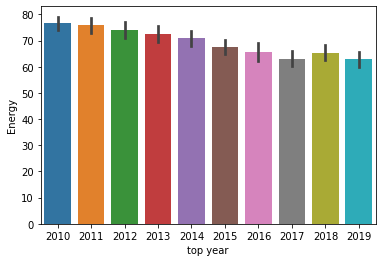

In [ ]:
# Barplot Avg. Energy for each year
sns.barplot(data=top_songs, x="top year", y="nrgy" ).set(ylabel='Energy')

[Text(0, 0.5, 'Danceability')]

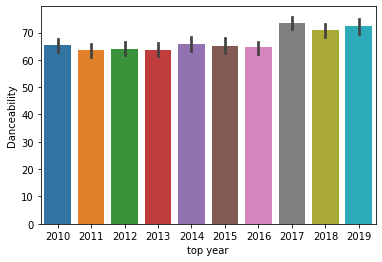

In [ ]:
# Barplot Avg. Danceability for each year
sns.barplot(data=top_songs, x="top year", y="dnce" ).set(ylabel='Danceability')

[Text(0, 0.5, 'Positivity')]

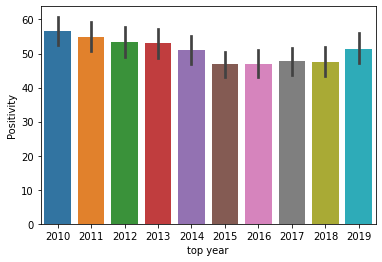

In [ ]:
# Barplot Avg. Positivitiy for each year
sns.barplot(data=top_songs, x="top year", y="val" ).set(ylabel='Positivity')

**Q1:** Explain your choice of plots using the five visualization components: 
1. Data component -- what kinds of data are you dealing with?
2. Graphical component -- what kinds of plot can you use?
3. Label component -- what should be on the plot axis?
4. Esthetic component -- what should you plot say, and how best to do this?
5. Ethical component -- Is the graph misleading, what is left out?

1. My chosen fields are all numerical data. The BPM field is a value representing the beats per minute in a song. This is an integer value ranging from approx. 60 to 200. It is a somewhat discrete field. The other 3 fields are a float values ranging from 0 to 100. Each of them is a somewhat subjective rating of a songs "Energy", "Danceability", and "Positivity". They are continuous data points.

2. Bar plots seem to work really well here. For BPM it doesnt make much sense to connect each bar because BPM is an integer value, and values that arent multiples of 10 or 5 are uncommon. For the other 3 values it can also help to categorize them by year. Otherwise we see a somewhat normal distribution over many years.

3. For the BPM distribution, it makes sense to have the count along the y-axis, and bpm along the x-axis. For other plots, having time (top year) along the x-axis is more correct and can help show trends left to right.

4. Categorizing the fields by top year will help to show how these values have changed over the last decade. We want to see some overall trend from left to right. The only field that this does not work for is the BPM plot, as this seems to remain fairly constant over the years.

5. I dont think these plots are misleading, but there are some interesting things to consider: These are only the top 100 songs of each year. I also do not know if this global top 100 or just north american. Each song has a different level of promotion that could lead to an unnatural placement for a song. The specifics on how these values is also a point of concern, as they are just values provided by spotify. 


## <font color='lightblue'>4. Correlations</font>

**Action:** Use correlation to estimate the relationship between some of the key variables. Try exploring for interesting relationships using heatmaps.

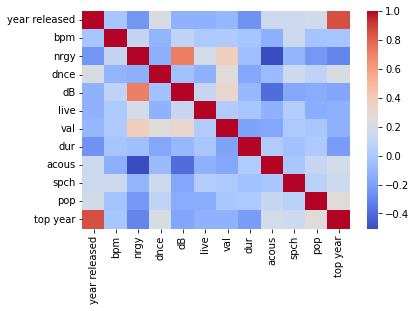

In [ ]:
# Generate Correlation map
correlation = top_songs.corr()
sns.heatmap(correlation, cmap="coolwarm")

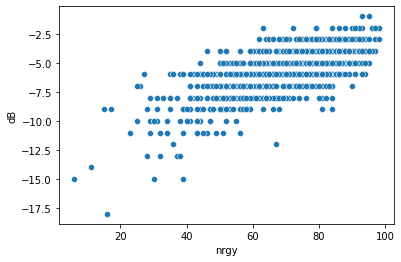

In [ ]:
# Scatterplot Energy VS dB
sns.scatterplot(data=top_songs, x='nrgy',y='dB')

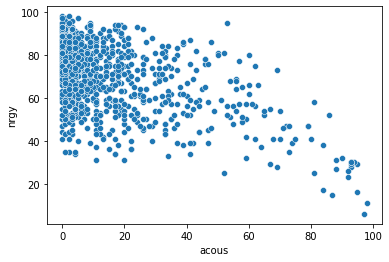

In [ ]:
# Scatterplot Acousticness VS Energy
sns.scatterplot(data=top_songs, x='acous',y='nrgy')

**Q2:** Choose one or two correlations and describe what the magnitude and direction of the correlation suggests about the relationship between the two variables.

**1. Energy - Loudness (dB)**

This appears to be one of the largest positive correlations in our dataset. A positive correlation suggests that as the Energy value in a given song increases, the loudness value also tends to increase. This would make sense, as louder music usually serves the purpose of music at exciting events like sports games or clubs. A higher volume level also has some physical effects on the body, that could generate an energetic feeling.

**2. Acousticness - Energy**

This is the largest negative correlation in our dataset. It is negative meaning as a songs Acoutsic rating increases, the Energy value tends to decrease. This correlation is what we would expect given what we know about music. Acoustic instruments tend to be quieter than electric ones. And because we know about the relationship between loudness and energy, we would expect this relationship to occur aswell.

## <font color='lightblue'>5. Discussion</font>

**Q3:** Did this exploritory data analysis help you better understand your chosen dataset? If so how? Is there still parts that don't make sense? 
> The idea with this question is not to see if you know everything about this dataset, just how EDA might have helped (or not!).

Yes it did. It helped me gain an understanding of these variables that spotify gives to songs (nrgy, dnce, val, etc.), because there isnt one scientific definition for what those fields should be. They are in nature a little subjective, so we first need to get a feel for how spotify has defined them to really understand and start working with the data.